In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
data=pd.read_csv("C:/Users/arcot/Desktop/Datasets/IRIS Flower.csv")

In [28]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
print(data.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [30]:
#Summary statistics of the dataset
print(data.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [31]:
# Checking the distribution of classes
print(data['species'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


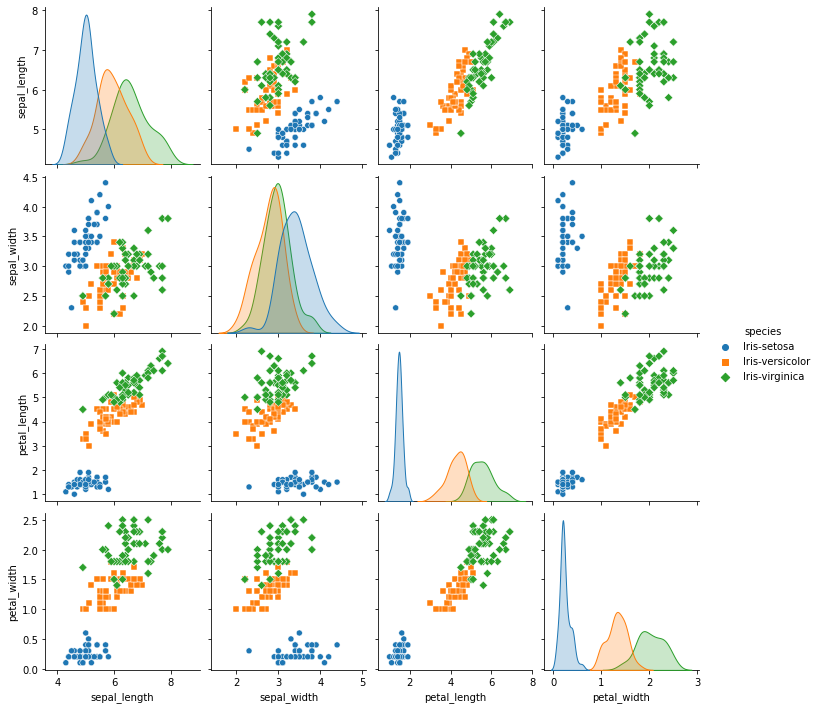

In [7]:
# Pairplot to visualize relationships between features
sns.pairplot(data, hue='species', markers=["o", "s", "D"])
plt.show()

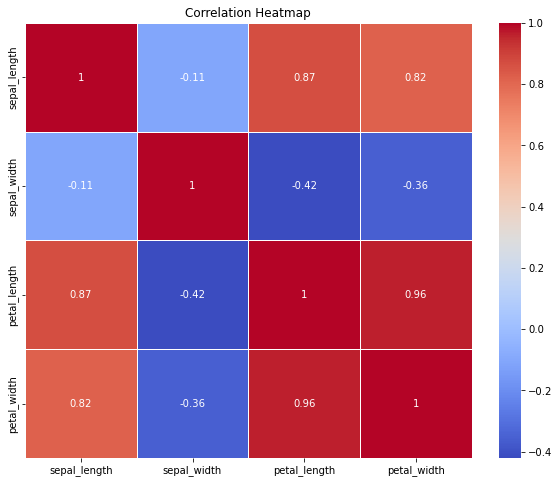

In [32]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

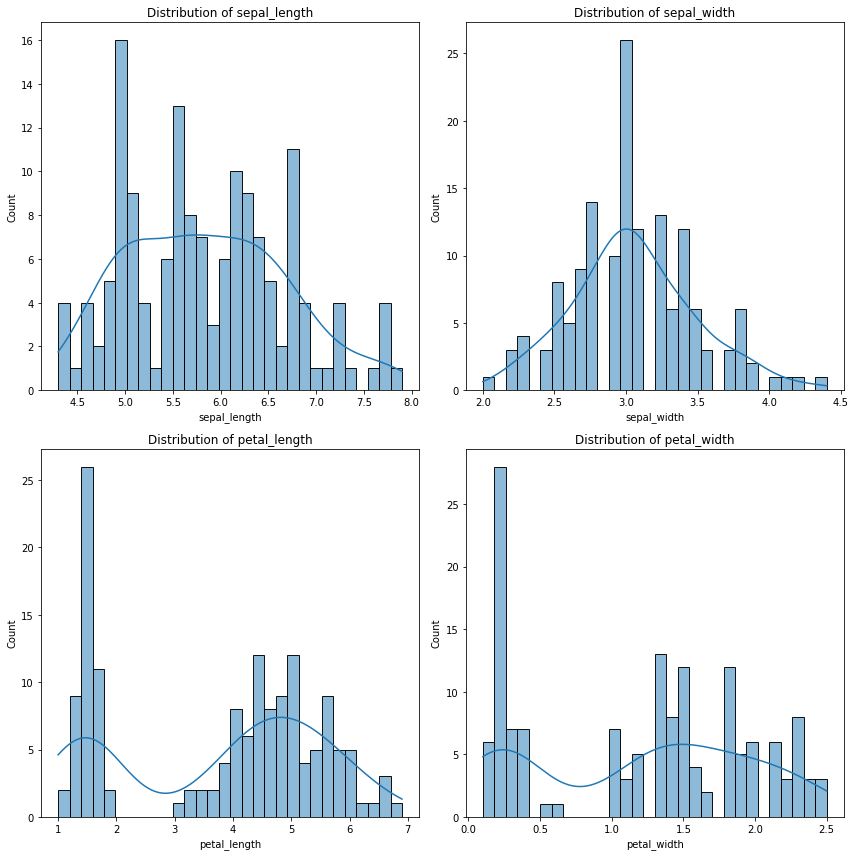

In [33]:
# Distribution plots for each feature
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
plt.figure(figsize=(12, 12))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


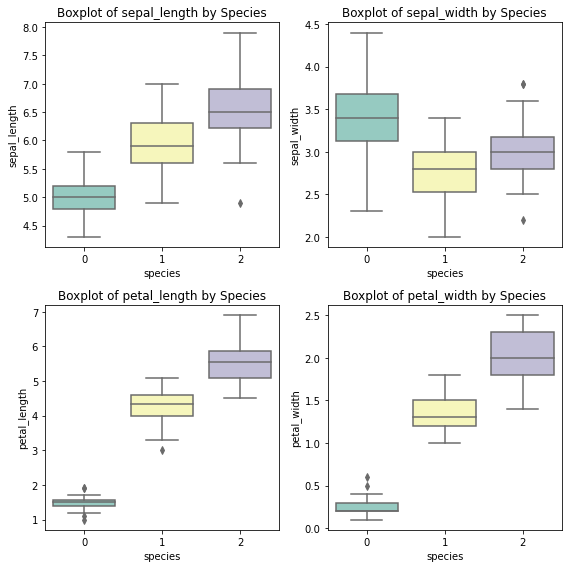

In [11]:
# Box plots for each feature by species
plt.figure(figsize=(8, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=data, palette='Set3')
    plt.title(f'Boxplot of {feature} by Species')
plt.tight_layout()
plt.show()

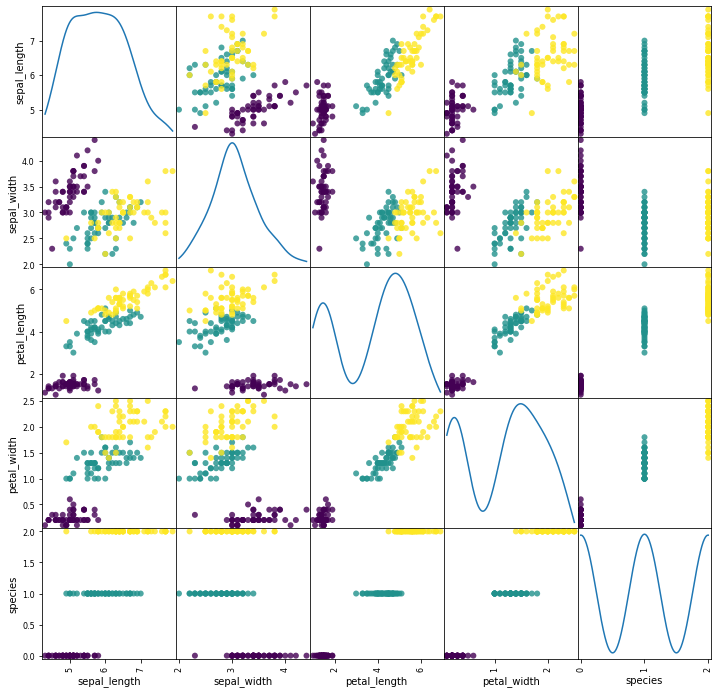

In [12]:
# Scatter matrix
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.8, figsize=(12, 12), diagonal='kde', marker='o', c=data['species'], cmap='viridis')
plt.show()

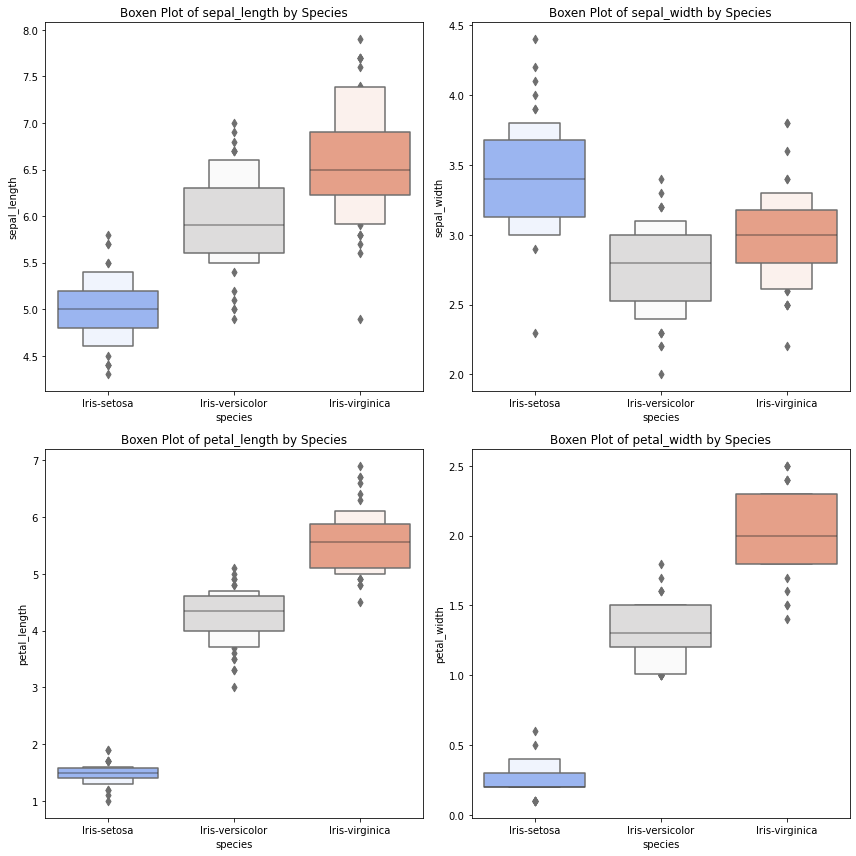

In [56]:
# Boxen plots for each feature by species
plt.figure(figsize=(12, 12))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxenplot(x='species', y=feature, data=data, palette='coolwarm')
    plt.title(f'Boxen Plot of {feature} by Species')
plt.tight_layout()
plt.show()

In [34]:
# Splitting the dataset into features and target
X = data.drop('species', axis=1)
y = data['species']
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**KNN** 

KNN Accuracy: 93.33%
KNN Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



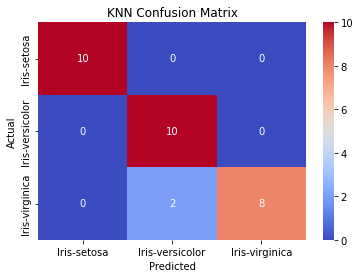

In [36]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_scaled, y_train)

# Prediction on test data
prediction_knn = model_knn.predict(X_test_scaled)

# Evaluating accuracy
accuracy_knn = accuracy_score(y_test, prediction_knn)
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")

# Classification report
print("KNN Classification Report:\n", classification_report(y_test, prediction_knn))

# Confusion matrix
conf_matrix_knn = confusion_matrix(y_test, prediction_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='coolwarm', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**RANDOM FOREST**

Random Forest Accuracy: 90.00%
Random Forest Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



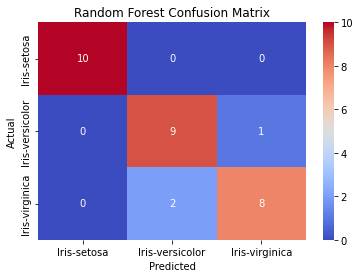

In [37]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_scaled, y_train)

# Prediction on test data
prediction_rf = model_rf.predict(X_test_scaled)

# Evaluating accuracy
accuracy_rf = accuracy_score(y_test, prediction_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

# Classification report
print("Random Forest Classification Report:\n", classification_report(y_test, prediction_rf))

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, prediction_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='coolwarm', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**SUPPORT VECTOR MACHINE**

SVM Accuracy: 96.67%
SVM Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



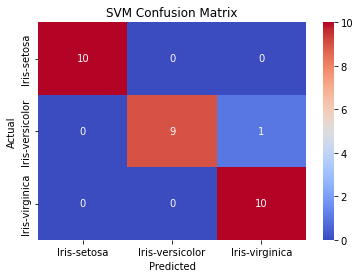

In [38]:
model_svm = SVC(random_state=42)
model_svm.fit(X_train_scaled, y_train)

# Prediction on test data
prediction_svm = model_svm.predict(X_test_scaled)

# Evaluating accuracy
accuracy_svm = accuracy_score(y_test, prediction_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")

# Classification report
print("SVM Classification Report:\n", classification_report(y_test, prediction_svm))

# Confusion matrix
conf_matrix_svm = confusion_matrix(y_test, prediction_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='coolwarm', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**GRADIENT BOOSTING**

Gradient Boosting Accuracy: 90.00%
Gradient Boosting Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



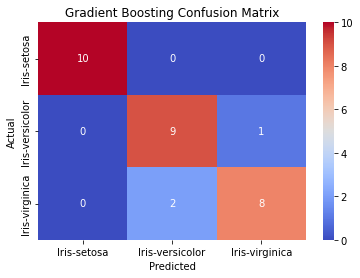

In [39]:
model_gbc = GradientBoostingClassifier(random_state=42)
model_gbc.fit(X_train_scaled, y_train)

# Prediction on test data
prediction_gbc = model_gbc.predict(X_test_scaled)

# Evaluating accuracy
accuracy_gbc = accuracy_score(y_test, prediction_gbc)
print(f"Gradient Boosting Accuracy: {accuracy_gbc * 100:.2f}%")

# Classification report
print("Gradient Boosting Classification Report:\n", classification_report(y_test, prediction_gbc))

# Confusion matrix
conf_matrix_gbc = confusion_matrix(y_test, prediction_gbc)
sns.heatmap(conf_matrix_gbc, annot=True, fmt='d', cmap='coolwarm', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**LOGISTIC REGRESSION**

Logistic Regression Accuracy: 93.33%
Logistic Regression Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



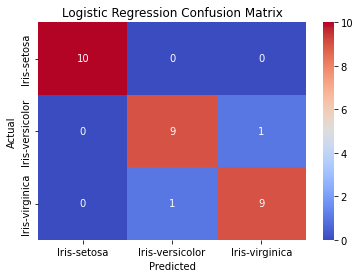

In [40]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression(random_state=42)
model_logistic.fit(X_train_scaled, y_train)

# Prediction on test data
prediction_logistic = model_logistic.predict(X_test_scaled)

# Evaluating the accuracy
accuracy_logistic = accuracy_score(y_test, prediction_logistic)
print(f"Logistic Regression Accuracy: {accuracy_logistic * 100:.2f}%")

# Classification report
print("Logistic Regression Classification Report:\n", classification_report(y_test, prediction_logistic))

# Confusion matrix
conf_matrix_logistic = confusion_matrix(y_test, prediction_logistic)
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='coolwarm', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


**DECISION TREE**

Decision Tree Accuracy: 90.00%
Decision Tree Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.89      0.80      0.84        10

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30



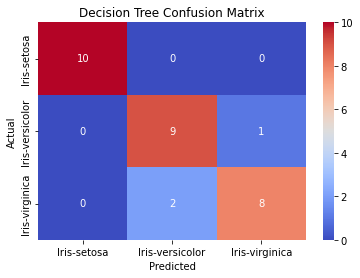

In [41]:
from sklearn.tree import DecisionTreeClassifier

model_decision_tree = DecisionTreeClassifier(random_state=42)
model_decision_tree.fit(X_train_scaled, y_train)

# Prediction on test data
prediction_decision_tree = model_decision_tree.predict(X_test_scaled)

# Evaluating the accuracy
accuracy_decision_tree = accuracy_score(y_test, prediction_decision_tree)
print(f"Decision Tree Accuracy: {accuracy_decision_tree * 100:.2f}%")

# Classification report
print("Decision Tree Classification Report:\n", classification_report(y_test, prediction_decision_tree))

# Confusion matrix
conf_matrix_decision_tree = confusion_matrix(y_test, prediction_decision_tree)
sns.heatmap(conf_matrix_decision_tree, annot=True, fmt='d', cmap='coolwarm', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

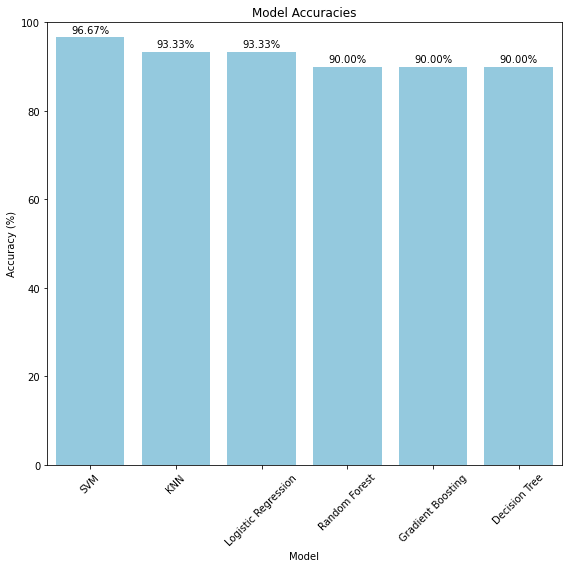

In [42]:
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}
accuracies = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    accuracies[model_name] = accuracy * 100
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)
plt.figure(figsize=(8, 8))
barplot = sns.barplot(x='Model', y='Accuracy', data=accuracy_df, color='skyblue')
for i, (index, row) in enumerate(accuracy_df.iterrows()):
    barplot.text(i, row['Accuracy'] + 1, f"{row['Accuracy']:.2f}%", color='black', ha="center")
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100) 
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [54]:
X_new_pred=np.array([[3,2.2,1,0.2],[5.3,2.5,4.6,1.9]])
prediction=model_svm.predict(X_new_pred)
print("The prediction of species is: {}".format(prediction))

The prediction of species is: ['Iris-virginica' 'Iris-setosa']
